In [1]:
import pandas as pd
import itertools
import re
import numpy as np

In [2]:
dir = 'cleveland.data'

In [3]:
import chardet
def detect_encoding(file):
    detector = chardet.universaldetector.UniversalDetector()
    with open(file, "rb") as f:
        for line in f:
            detector.feed(line)
            if detector.done:
                break
    detector.close()
    return detector.result
encoding = detect_encoding(dir)
print("Encoding:", encoding)

Encoding: {'encoding': 'MacRoman', 'confidence': 0.7271868978805395, 'language': ''}


In [4]:
with open(dir,encoding = 'MacRoman') as file:
  temp = [line.strip() for line in file]

In [5]:
# temp


In [6]:
len(temp)

2982

In [7]:
# for i in range(0,2820):
#   print(temp[i])


In [8]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(temp[i:(i+10)]).split() for i in range(0,len(temp),10))
)

In [9]:
df = pd.DataFrame(data)

In [10]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
277,294,0,39,0,-9,-9,-9,-9,3,138,...,1,1,1,1,1,1,2,-9,-9,name
278,295,0,57,1,-9,-9,-9,-9,2,154,...,1,1,1,1,1,1,1,-9,-9,name
279,296,0,58,0,-9,-9,-9,-9,4,130,...,1,1,1,1,1,1,1,-9,-9,name
280,297,0,57,1,-9,-9,-9,-9,4,110,...,1,2,1,1,1,1,1,-9,-9,name
281,298,0,47,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [12]:
df = df.iloc[:,:-1]
df = df.iloc[:,1:74]

In [13]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0,63,1,-9,-9,-9,-9,1,145,1,...,1,-9,1,1,1,1,1,1,1,-9
1,0,67,1,-9,-9,-9,-9,4,160,1,...,1,-9,1,1,1,1,1,1,1,-9
2,0,67,1,-9,-9,-9,-9,4,120,1,...,1,-9,2,2,1,1,1,7,3,-9
3,0,37,1,-9,-9,-9,-9,3,130,0,...,1,-9,1,1,1,1,1,1,1,-9
4,0,41,0,-9,-9,-9,-9,2,130,1,...,1,-9,1,1,1,1,1,1,1,-9


In [14]:
df = df.astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

In [16]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,64,65,66,67,68,69,70,71,72,73
0,0.0,63.0,1.0,-9.0,-9.0,-9.0,-9.0,1.0,145.0,1.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
1,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,160.0,1.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
2,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,120.0,1.0,...,1.0,-9.0,2.0,2.0,1.0,1.0,1.0,7.0,3.0,-9.0
3,0.0,37.0,1.0,-9.0,-9.0,-9.0,-9.0,3.0,130.0,0.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
4,0.0,41.0,0.0,-9.0,-9.0,-9.0,-9.0,2.0,130.0,1.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
5,0.0,56.0,1.0,-9.0,-9.0,-9.0,-9.0,2.0,120.0,1.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
6,0.0,62.0,0.0,-9.0,-9.0,-9.0,-9.0,4.0,140.0,0.0,...,2.0,-9.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,-9.0
7,0.0,57.0,0.0,-9.0,-9.0,-9.0,-9.0,4.0,120.0,1.0,...,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0
8,0.0,63.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,130.0,1.0,...,1.0,-9.0,2.0,1.0,1.0,1.0,6.0,7.0,2.0,-9.0
9,0.0,53.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,140.0,0.0,...,1.0,-9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0


In [17]:
df.replace(-9.0, np.nan , inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

In [19]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
69      0
70      0
71      0
72      0
73    282
Length: 73, dtype: int64

In [20]:
df_select = df.iloc[:,[1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_select.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [21]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [22]:
column_map = {2:'age',
              3:'sex',
              8:'cp',
              9:'trestbps',
              11:'chol',
              15:'fbs',
              18:'restecg',
              31:'thalach',
              37:'exang',
              39:'oldpeak',
              40:'slope',
              43:'ca',
              50:'thal',
              57:'label'}

df_select.rename(columns = column_map, inplace = True)

<ipython-input-22-519c564fc85e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns = column_map, inplace = True)


In [23]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  label     282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [24]:
df_select.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
label       0
dtype: int64

In [25]:
# columns_to_drop = ['ca', 'slope','thal']
# df_select = df_select.drop(columns_to_drop, axis=1)

In [26]:
# df_select.info()

In [27]:
meanca = df_select['ca'].mean()
meanthal = df_select['thal'].mean()

In [28]:
df_select['ca'].fillna(value = round(meanca), inplace = True)
df_select['thal'].fillna(value = round(meanthal), inplace = True)

<ipython-input-28-3426ce30672d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['ca'].fillna(value = round(meanca), inplace = True)
<ipython-input-28-3426ce30672d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['thal'].fillna(value = round(meanthal), inplace = True)


In [29]:
df_select.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [30]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  label     282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [31]:
dupe = df_select.duplicated(keep = False)

In [32]:
print(df_select[dupe])

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, label]
Index: []


In [33]:
df_select['label'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: label, dtype: int64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
df_select.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.353728,0.103751,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.095005,0.389126,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.208906,0.259609,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.080754,0.122973,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.129764,0.040570,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.117625,0.064050,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112083,0.020806,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.254544,-0.256681,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.151577,0.334712,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.253958,0.331229,0.487529


<Axes: >

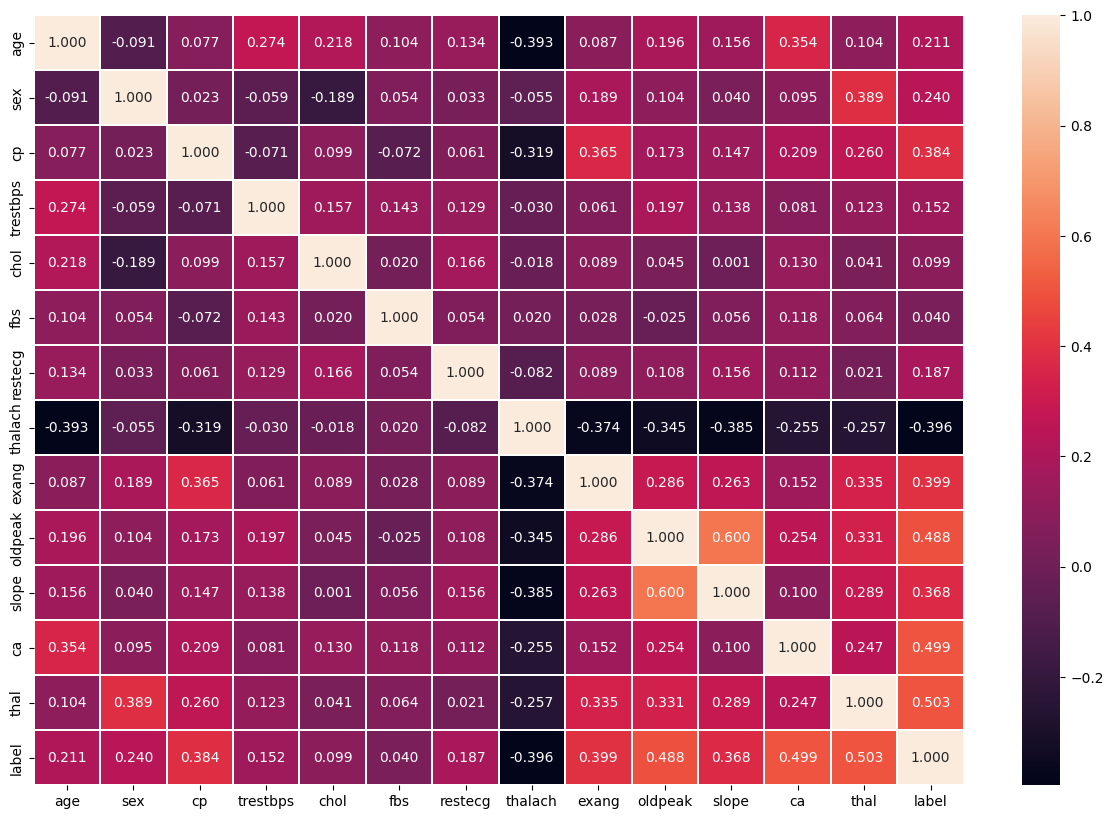

In [36]:
cor_mat = df_select.corr()

fig,ax = plt.subplots(figsize = (15,10))

sns.heatmap(cor_mat,annot= True, linewidth = 0.1,fmt = '.3f')

In [37]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  label     282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [38]:
x = df_select.iloc[:,:-1]
y = df_select['label']

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
dtypes: float64(13)
memory usage: 28.8 KB


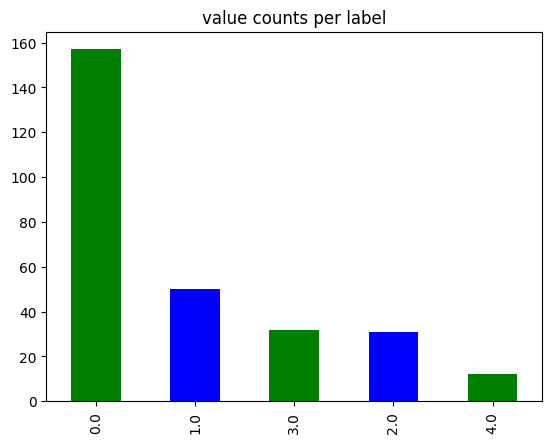

In [40]:
df_select['label'].value_counts().plot(kind = 'bar',color = ('green','blue'))
plt.title('value counts per label')
plt.show()

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state = 42)
x_smote,y_smote = smote.fit_resample(x,y)

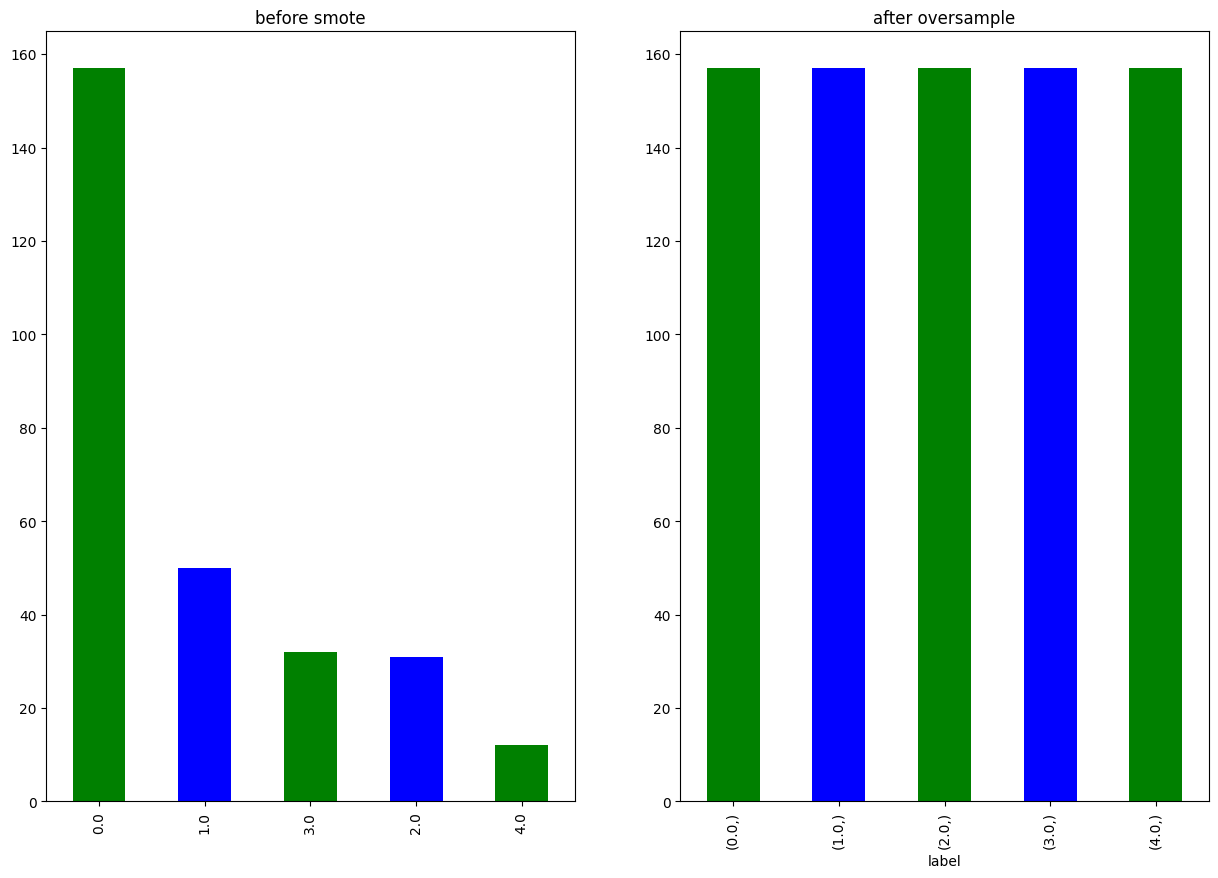

In [43]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
df_select['label'].value_counts().plot(kind = 'bar' , color = ('g','b'))
plt.title('before smote')


temp = pd.DataFrame(data = y_smote)

plt.subplot(1,2,2)
temp.value_counts().plot(kind= 'bar' , color =('g','b'))
plt.title('after oversample')

plt.show()

In [44]:
temp.value_counts()

label
0.0      157
1.0      157
2.0      157
3.0      157
4.0      157
dtype: int64

In [45]:
df_select.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.666667,4.680851,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.933113,1.932377,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_smoteScaler = scaler.fit_transform (x_smote)

In [47]:
temp = pd.DataFrame(x_smoteScaler)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559445,0.780664,0.811789,0.374596,0.285383,0.140162,0.602946,0.542237,0.456058,0.238072,0.381666,0.349198,0.639917
std,0.168570,0.374983,0.283246,0.149340,0.111147,0.310030,0.440893,0.161073,0.443026,0.180516,0.258547,0.323277,0.423356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.422710,0.000000,0.091628,0.097991,0.000000,0.119594
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806,0.500000,0.333333,0.892559
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.368408,0.500000,0.657261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train ,y_test = train_test_split(x_smoteScaler,y_smote,test_size = 0.2,random_state = 42, shuffle = True, stratify = y_smote)

In [49]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred_knn = knn_model.predict(x_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.822
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83        32
         1.0       0.72      0.74      0.73        31
         2.0       0.74      0.84      0.79        31
         3.0       0.84      0.81      0.83        32
         4.0       0.91      0.97      0.94        31

    accuracy                           0.82       157
   macro avg       0.83      0.82      0.82       157
weighted avg       0.83      0.82      0.82       157



In [53]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.822, 'recall': 0.822, 'F1 score': 0.822, 'Precision score': 0.827}


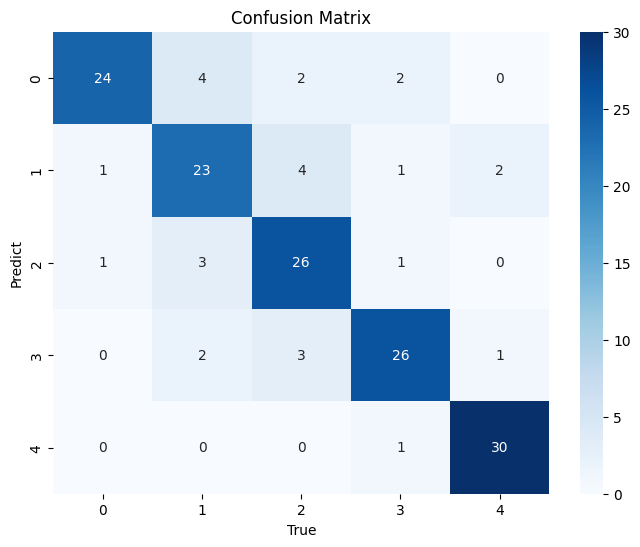

In [54]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.949
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       1.00      0.87      0.93        31
         2.0       0.91      0.94      0.92        31
         3.0       0.97      0.97      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [57]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.949, 'recall': 0.949, 'F1 score': 0.949, 'Precision score': 0.952}


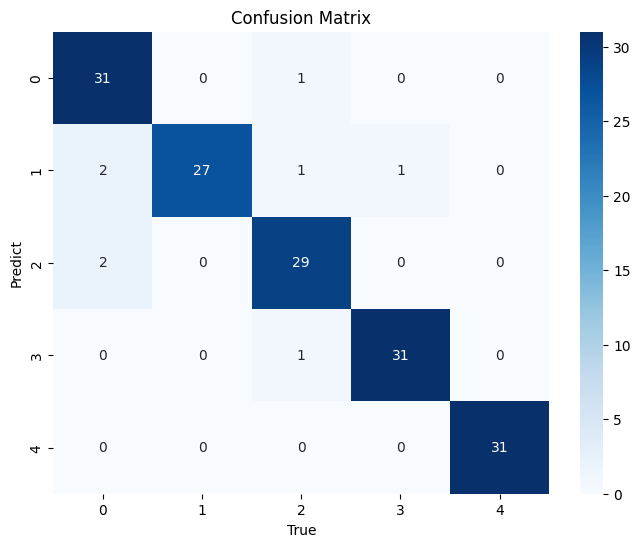

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [59]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.89      0.77      0.83        31
         2.0       0.87      0.87      0.87        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      0.97      0.97        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [61]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.885, 'Precision score': 0.887}


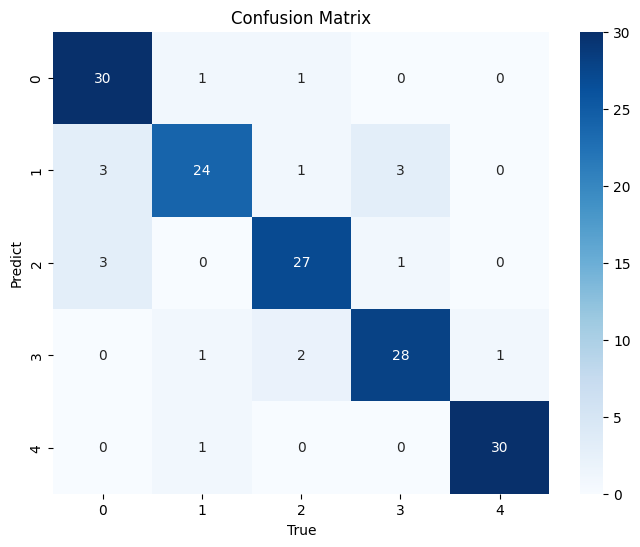

In [62]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)


knn_model.fit(x_train, y_train)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 54, 'algorithm': 'auto'}


In [65]:
y_pred_knn = knn_model.predict(x_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.892
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88        32
         1.0       0.86      0.81      0.83        31
         2.0       0.85      0.94      0.89        31
         3.0       0.86      0.94      0.90        32
         4.0       0.94      0.97      0.95        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.89       157
weighted avg       0.89      0.89      0.89       157



In [66]:
evaluation(y_test,y_pred_knn)


{'accuracy': 0.892, 'recall': 0.892, 'F1 score': 0.891, 'Precision score': 0.895}


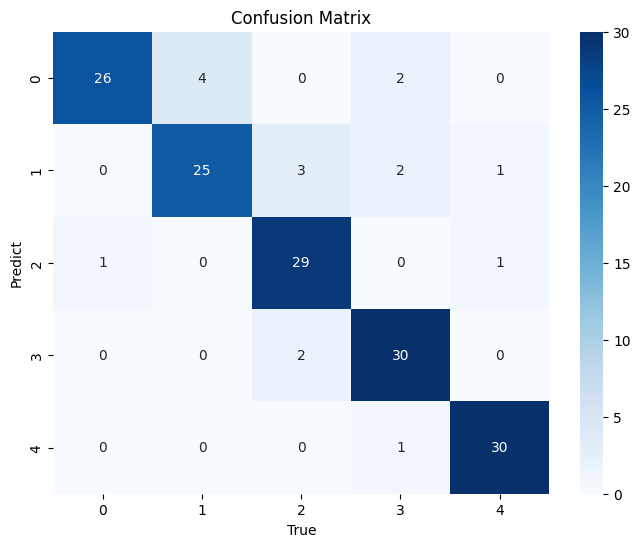

In [67]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [68]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(x_train , y_train)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [69]:
y_pred_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.924
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        32
         1.0       0.90      0.87      0.89        31
         2.0       0.90      0.90      0.90        31
         3.0       0.97      0.91      0.94        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [70]:
evaluation(y_test,y_pred_rf)


{'accuracy': 0.924, 'recall': 0.924, 'F1 score': 0.923, 'Precision score': 0.924}


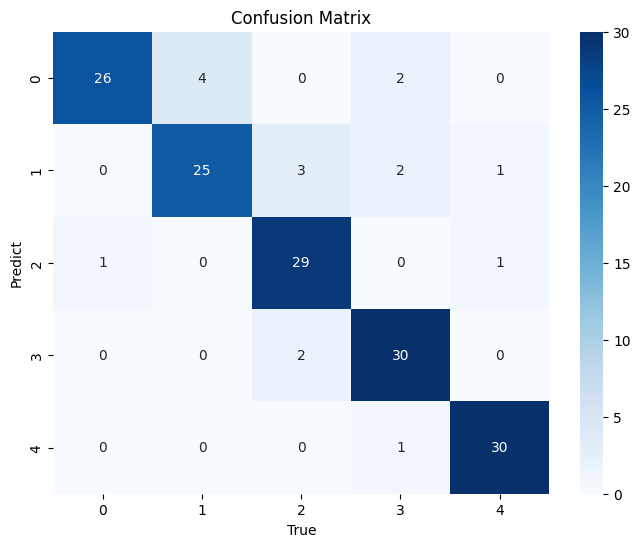

In [71]:
cm = confusion_matrix(y_test, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [72]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)


xgb_model.fit(x_train, y_train)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [73]:
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        32
         1.0       0.92      0.77      0.84        31
         2.0       0.84      0.84      0.84        31
         3.0       0.88      0.88      0.88        32
         4.0       0.97      1.00      0.98        31

    accuracy                           0.89       157
   macro avg       0.89      0.89      0.88       157
weighted avg       0.89      0.89      0.88       157



In [74]:
evaluation(y_test,y_pred_xgb)



{'accuracy': 0.885, 'recall': 0.885, 'F1 score': 0.884, 'Precision score': 0.887}


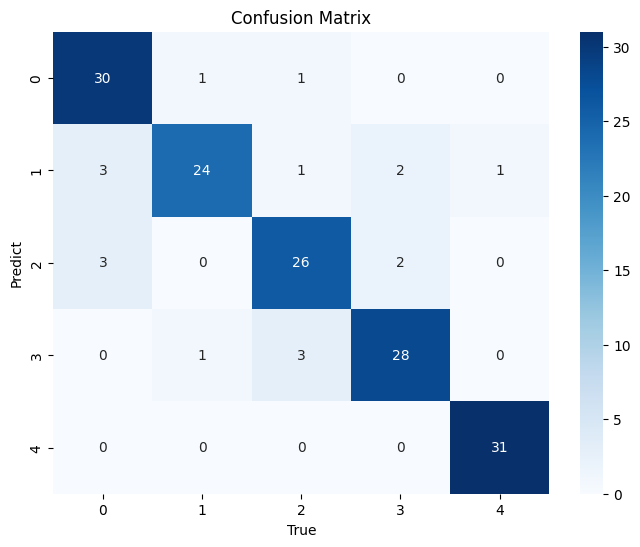

In [75]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [76]:
model_comp1  = pd.DataFrame({'model':['KNN','RF','XGB'],
                             'akurasi':[accuracy_knn_smote*100,accuracy_rf_smote*100,accuracy_xgb_smote*100]})

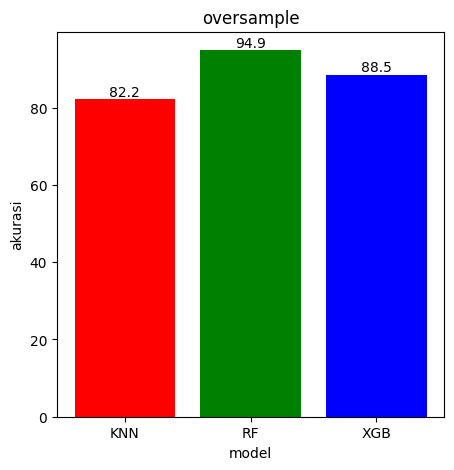

In [77]:
plt.figure(figsize=(5,5))

bars = plt.bar(model_comp1['model'],model_comp1['akurasi'],color= ('r','g','b'))
plt.xlabel('model')
plt.ylabel('akurasi')
plt.title('oversample')

for bar in bars:
    # mendapatkan akuasi per bar
    yval = bar.get_height()
    # bar.get_x() : memberikan posisi x awal dari setiap bar.
    # bar.get_width() : untuk memberikan lebar batang.
    # bar.get_x() + bar.get_width()/2: Ini menghitung koordinat x yang berada di tengah-tengah batang dengan menambahkan setengah dari lebar batang ke posisi awal batang.
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()